<a href="https://colab.research.google.com/github/Sarinda251/CAP_4630/blob/master/HW_2/HW2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2

## Imports

In [0]:
from mpl_toolkits import mplot3d
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Generate random data

In [0]:
# generate m random pairs (x, y)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

In [0]:
X2 = 2 * np.random.rand(m, 1)
z = 4 + 3 * X2 + 2 * X + np.random.rand(m, 1)

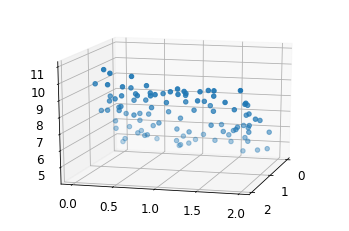

In [11]:
ax = plt.axes(projection='3d')
ax.view_init(15, 15)
ax.set_xticks(np.linspace(0,2,3))
ax.set_yticks(np.linspace(0,2,5))
ax.scatter3D(X, X2, y, cmap='Greens');

In [12]:
print(X.shape)

(100, 1)


In [13]:
# show the first 5 rows
print(X[:5, :])

[[0.13164486]
 [1.73112511]
 [1.07033391]
 [1.78628419]
 [1.82055907]]


## Combine bias $b=w_0$ and weights $w_1$ and $w_2$

Planar regression predicts $\hat{y}=b + w_1 x_1 + w_2 x_2$. It will be convenient to rewrite this as a dot product.  Define $w=(w_0, w_1, w_2)$ and $x=(1, x_1, x_2)$.  Then, we have $\hat{y}=w \boldsymbol{\cdot} x$.

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X, X2])

In [15]:
print(X_b.shape)

(100, 3)


In [16]:
# show the first 5 rows
print(X_b[:5, :])

[[1.         0.13164486 0.0207701 ]
 [1.         1.73112511 0.7988956 ]
 [1.         1.07033391 0.26118643]
 [1.         1.78628419 1.61432194]
 [1.         1.82055907 1.19393432]]


In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1) 

# Linear regression using mini-batch gradient descent
A few training examples are selected to compute the gradient.

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

### Approximated weights

In [19]:
weight_path_mgd[-1]

array([[3.34184287],
       [3.15954073],
       [0.84948762]])

In [0]:
weight_path_mgd = np.array(weight_path_mgd)
Xf, Yf = np.meshgrid(np.linspace(0, 2, 20), np.linspace(0, 2, 20))

def plane(x,y):
  return weight_path_mgd[-1,0] + (weight_path_mgd[-1,1] * x) + (weight_path_mgd[-1,2] * y)

Zf = plane(Xf,Yf)

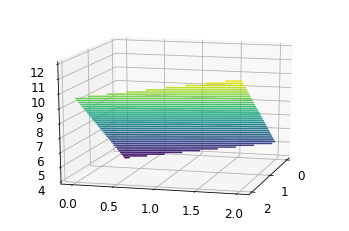

In [21]:
ax = plt.axes(projection='3d')
ax.contour3D(Xf, Yf, Zf, 50)
ax.view_init(15, 15)
ax.set_xticks(np.linspace(0,2,3))
ax.set_yticks(np.linspace(0,2,5))
ax.set_zlim(4, 12)


plt.show()

### Weight Path

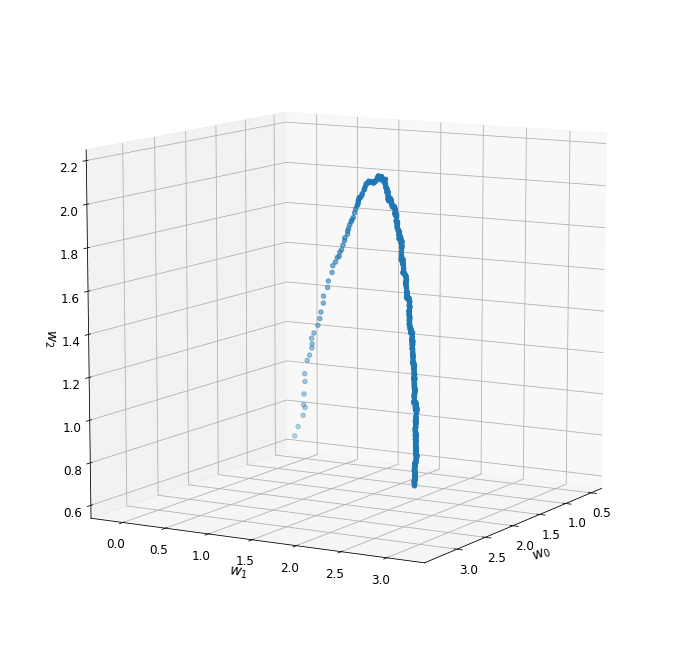

In [22]:
# mycode
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.view_init(10, 30)
#ax.set_xticks(np.linspace(0,2,3))
#ax.set_yticks(np.linspace(0,2,5))
ax.scatter3D(weight_path_mgd[:, 0], weight_path_mgd[:, 1], weight_path_mgd[:, 2], cmap='Greens');
ax.set_xlabel("$w_0$")
ax.set_ylabel("$w_1$")
ax.set_zlabel("$w_2$")
plt.show()